# Dataset description

## Exploratory data analysis
As first step we're going to study previously gathered from 32 different subreddits. We will see how many submissions have been labeled by moderators and how many contain images easily retrievable

In [1]:
import pandas as pd
from subreddit_list import subreddit_list

In [2]:
base_path = 'D:\Politecnico\Tesi\Script\Reddit crawling\Dataset\\'
images_domains = ['i.redd.it','imgur.com']

In [6]:
info_lists = []

for subreddit_name in subreddit_list:
    df = pd.read_csv(base_path + subreddit_name + ".csv", low_memory = False)
    df['dummy'] = 1
    info = {'name': subreddit_name}
    
    info['length']                 = len(df)
    info['num_images']             = len(df[(df['domain'].isin(images_domains)) == True])
    info['percentage_images']      = info['num_images']/info['length']
    info['text_only']              = len(df[df['is_self'] == True])
    info['percentage_text_only']   = info['text_only']/info['length']
    info['percentage_redirect']    = 1 - (info['percentage_images'] + info['percentage_text_only'])
    
    if('link_flair_text' in df.columns):
        info['num_labels']         = len(df['link_flair_text'].unique())
        info['percentage_labeled'] = len(df[df['link_flair_text'].isna() == False])/info['length']
        info['flairs']             = df.groupby(['link_flair_text']).count().sort_values(by = 'dummy', ascending = False).index.values.tolist()
    else:
        info['num_labels']         = "No labels"
        info['percentage_labeled'] = "No labels"
        info['flairs']             = "No labels"
        
    info_lists.append(info)
    
    print(subreddit_name + " info:")
    print("\tLen: "                                   + str(info['length']))
    print("\tImages: "                                + str(info['num_images']))
    print("\tPercentage of submissions with images: " + str(info['percentage_images']))
    print("\tText_only: "                             + str(info['text_only']))
    print("\tPercentage of text only submissions: "   + str(info['percentage_text_only']))
    print("\tPercentage of submissions with redirect" + str(info['percentage_redirect']))
    print("\tDifferent labels: "                      + str(info['num_labels']))
    print("\tSubmissions labeled: "                   + str(info['percentage_labeled']))
    print("\tTop 10 labels: "                         + str(info['flairs'][0:min(10,len(info['flairs']))]))
    print("\n")

coronavirusDownunder info:
	Len: 5684
	Images: 725
	Percentage of submissions with images: 0.12755102040816327
	Text_only: 2774
	Percentage of text only submissions: 0.488036593947924
	Percentage of submissions with redirect0.3844123856439128
	Different labels: 28
	Submissions labeled: 0.8291695988740324
	Top 10 labels: ['News Report', 'Discussion', 'Question', 'Humour (yes we allow it here)', 'Opinion/Speculation', 'Data', 'Prepping &amp; Self Protection ', 'Official Government/WHO/Departmental response ', 'Good news', 'New Case']


coronavirusMemes info:
	Len: 10000
	Images: 7719
	Percentage of submissions with images: 0.7719
	Text_only: 403
	Percentage of text only submissions: 0.0403
	Percentage of submissions with redirect0.18779999999999997
	Different labels: 7
	Submissions labeled: 0.8848
	Top 10 labels: ['Original Meme', 'Repost', 'Crosspost', 'YouTube', 'Twitter', 'ANNOUNCEMENT']


coronavirusUK info:
	Len: 10000
	Images: 1216
	Percentage of submissions with images: 0.1216
	Te

nottheonion info:
	Len: 10000
	Images: 0
	Percentage of submissions with images: 0.0
	Text_only: 3
	Percentage of text only submissions: 0.0003
	Percentage of submissions with redirect0.9997
	Different labels: 31
	Submissions labeled: 0.073
	Top 10 labels: ['Not oniony - Removed', 'Wrong/Altered Title', 'Repost - Removed', 'Wrong title - Removed', 'Not oniony - Removed Repost - Removed', 'Not oniony - Removed Not a news article - Removed', 'Not oniony - Removed Unreliable - Removed', 'Wrong title - Removed Not oniony - Removed', 'Older than 2 weeks - Removed', 'Not the original source - Removed']


usanews info:
	Len: 10000
	Images: 166
	Percentage of submissions with images: 0.0166
	Text_only: 0
	Percentage of text only submissions: 0.0
	Percentage of submissions with redirect0.9834
	Different labels: No labels
	Submissions labeled: No labels
	Top 10 labels: No labels


upliftingnews info:
	Len: 10000
	Images: 831
	Percentage of submissions with images: 0.0831
	Text_only: 0
	Percentag

In [7]:
df = pd.DataFrame(info_lists)
df.set_index(keys='name', inplace = True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Number of submission from the different subreddits

In [20]:
print("Total number of posts: " + str(sum(df['length'])))

Total number of posts: 242334


For the moment the data collection process was limited to max 10000 submission per subreddit, to allow an easy exploratory analysis and to assess whether all of the chosen subreddits are actually useful for our work. However, even with this limitation, it was already possible to gather almost 250k submission with extremely low effort. The real problem will be eliminating those unrelated and labelling the remaining ones.

As we can see, unfortunately 11 of them don't even reach this number, meaning that they're not particularly popular. We can avoid using them in the next round of data collection.

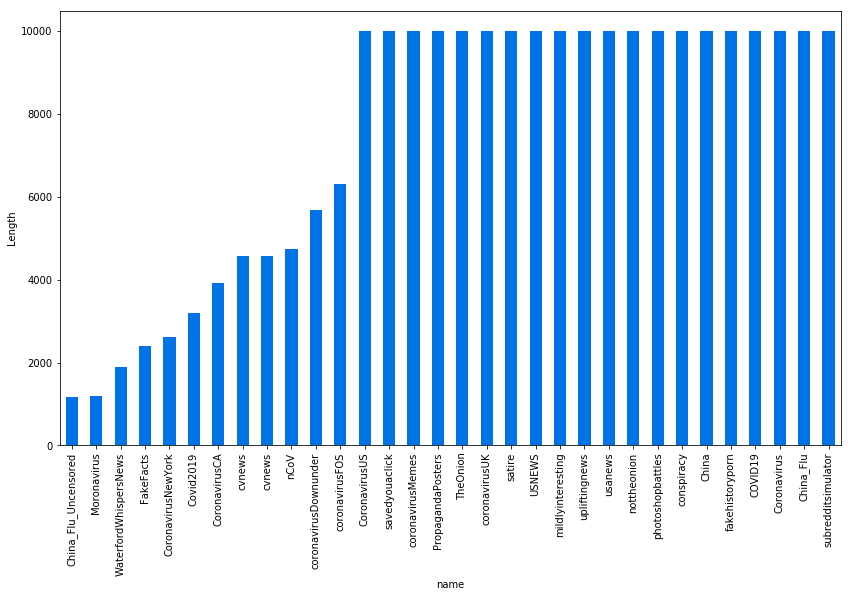

In [34]:
fig = df.sort_values(by='length')['length'].plot(kind='bar', color='#0073e6')
plt.ylabel('Length')
plt.rcParams["figure.figsize"] = (14,8)

In [35]:
df[df['length'] < 9999].index.values.tolist()

['coronavirusDownunder',
 'cvnews',
 'coronavirusFOS',
 'Covid2019',
 'Moronavirus',
 'China_Flu_Uncensored',
 'nCoV',
 'CoronavirusNewYork',
 'CoronavirusCA',
 'cvnews',
 'WaterfordWhispersNews',
 'FakeFacts']

## Number of images
Let's now look at how many submissions contain images that are easily retrievable. By "easily retrievable", we mean that they are stored on reddit itself or on imgur. Many more submissions contain images, but they might be stored on external websites, like Facebook, Twitter or newspapers websites and are shown on Reddit only as previous. This makes hard retrieving them, though I'll try to look into this problem in the future.

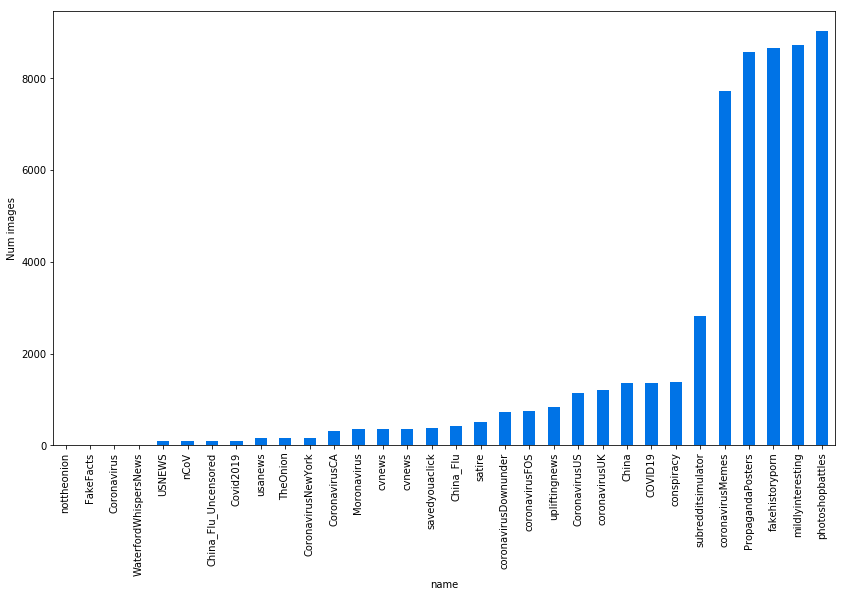

In [16]:
fig = df.sort_values(by='num_images')['num_images'].plot(kind='bar', color='#0073e6')
plt.ylabel('Num images')
plt.rcParams["figure.figsize"] = (14,8)

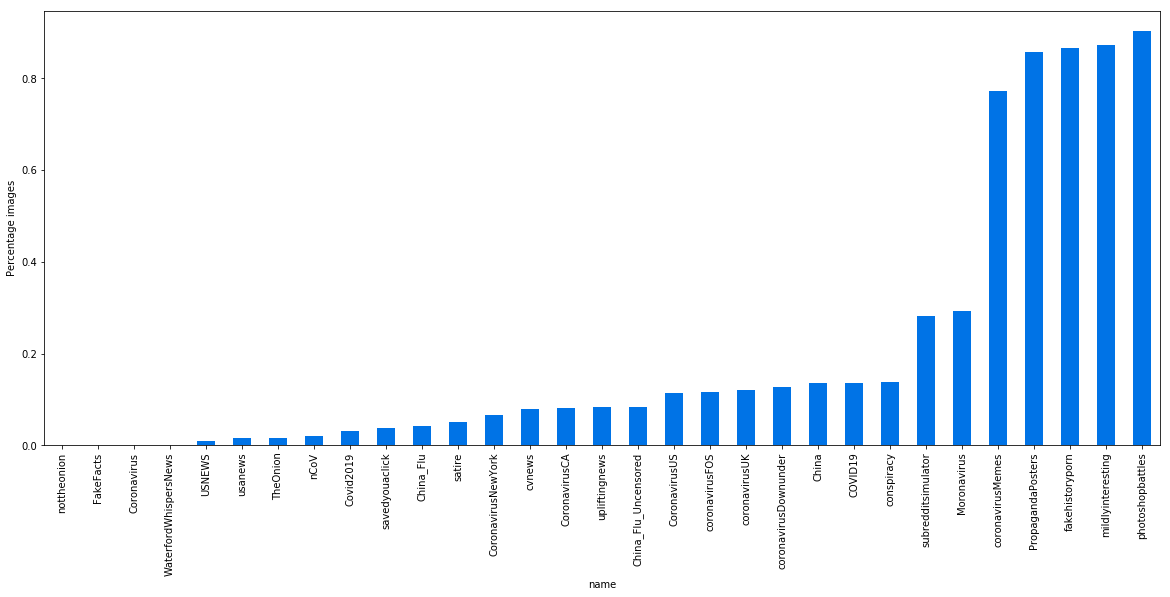

In [17]:
fig = df.sort_values(by='percentage_images')['percentage_images'].plot(kind='bar', color='#0073e6')
plt.ylabel('Percentage images')
plt.rcParams["figure.figsize"] = (14,8)

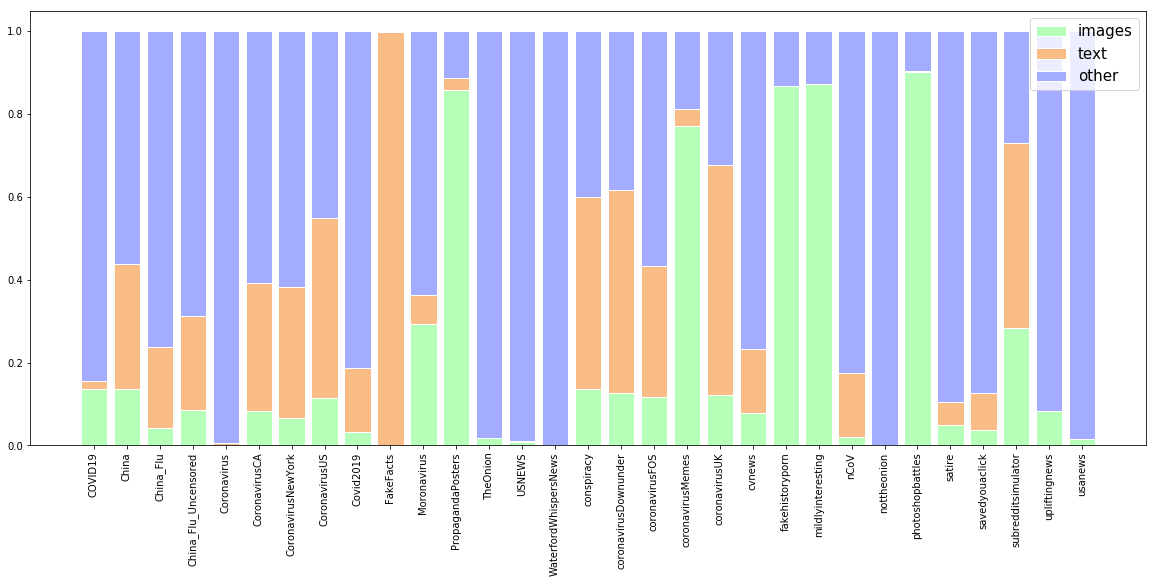

In [14]:
plt.bar(df.index, df['percentage_images'], color='#b5ffb9', edgecolor='white')
plt.bar(df.index, df['percentage_text_only'], bottom=df['percentage_images'], color='#f9bc86', edgecolor='white')
plt.bar(df.index, df['percentage_redirect'], bottom=[i+j for i,j in zip(df['percentage_images'], df['percentage_text_only'])], color='#a3acff', edgecolor='white')

plt.legend(['images', 'text', 'other'], prop = {'size':15})
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

In [38]:
print(str("Total number of images: ") + str(sum(df['num_images'])))
print(str(sum(df['num_images'])*100/sum(df['length'])) + str("% of the total"))

Total number of images: 57907
23.895532612014822% of the total


Although I was hoping for a better result, it still looks like a good start. To be noticed though that 5 subreddits seem to contain most of the images. Probably I'll need to find a way to retrieve pictures stored on other websites as well, or find a way to collect the previews.

## Percentage of labels
Moderators on Reddit can assign a "flair" to posts in their subreddit, in order to label them. This basically represents a form of crowd sourcing that we can exploit in our work.

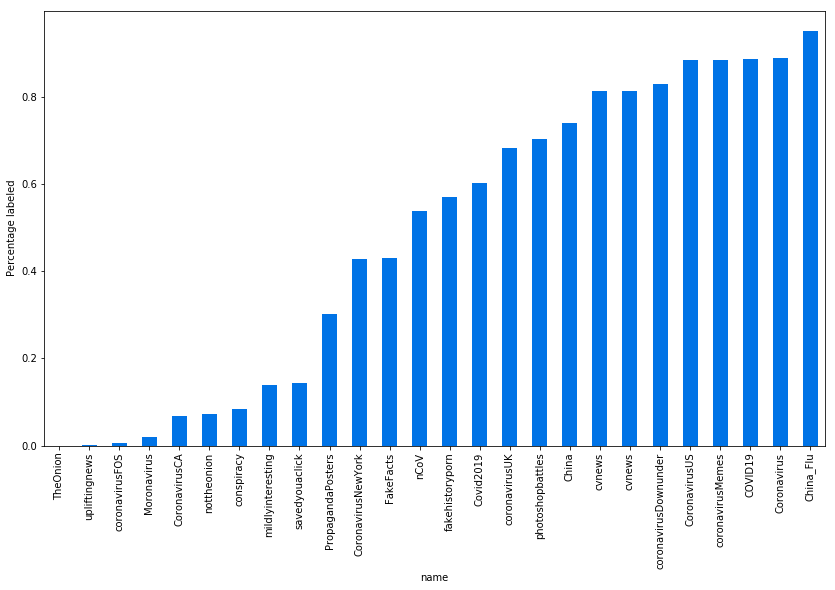

In [39]:
fig = df[df['percentage_labeled'] != 'No labels'].sort_values(by='percentage_labeled')['percentage_labeled'].plot(kind='bar', color='#0073e6')
plt.ylabel('Percentage labeled')
plt.rcParams["figure.figsize"] = (14,8)

### Next steps:
 - Check which of these have the term 'Coronavirus' or related in the title
 - Gather more data from the most promising subreddits